In [43]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from sklearn.metrics import mean_squared_error

In [24]:
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [25]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [26]:
#removing negative values
data.drop(['No'],axis=1,inplace=True)

In [27]:
#droping nulll values
data.dropna(subset=['pm2.5'],axis=0, inplace=True)


In [28]:
data.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [29]:
data['Timestamp'] = pd.to_datetime(data[['year','month','day','hour']])
data.drop(['year','month','day','hour'],axis=1, inplace=True)
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Timestamp
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [30]:
#now creating Timestamp for index\
data_index=data.set_index(['Timestamp'])
data_index.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Timestamp,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


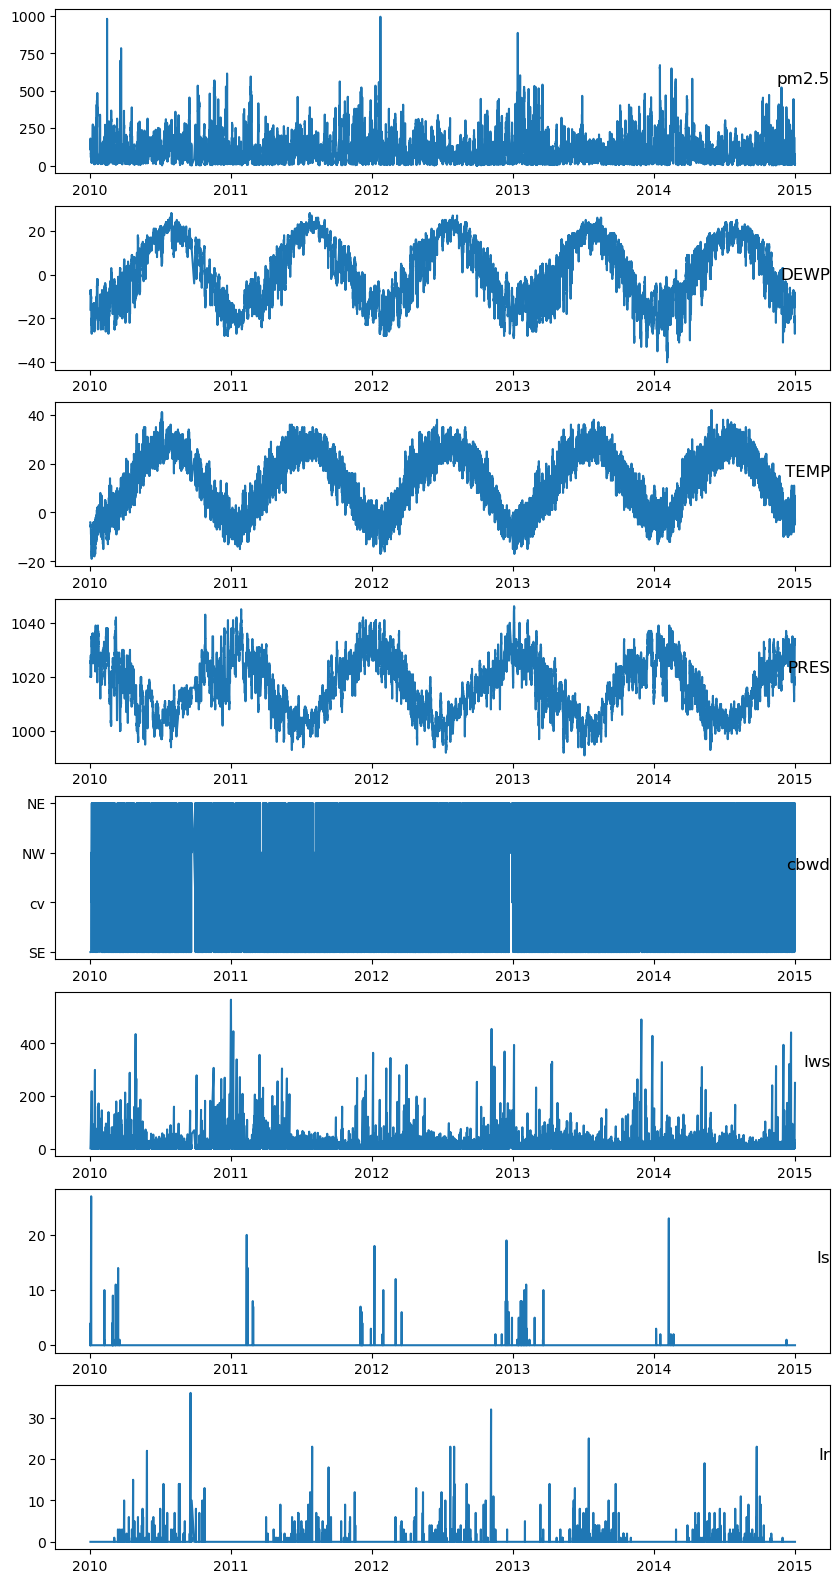

In [31]:
no_cols = len(data_index.columns)
index = 1
plt.figure(figsize = (10,20))
for column in data_index.columns:
    plt.subplot(no_cols,1,index)
    plt.plot(data_index[column])
    plt.title(column,loc='right',y=0.5)
    index+=1
    
plt.show()

In [32]:
encoder = LabelEncoder()
data_index['cbwd'] = encoder.fit_transform(data_index[['cbwd']])
data_index.head()

C:\Users\Hassan Lodhi\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Timestamp,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


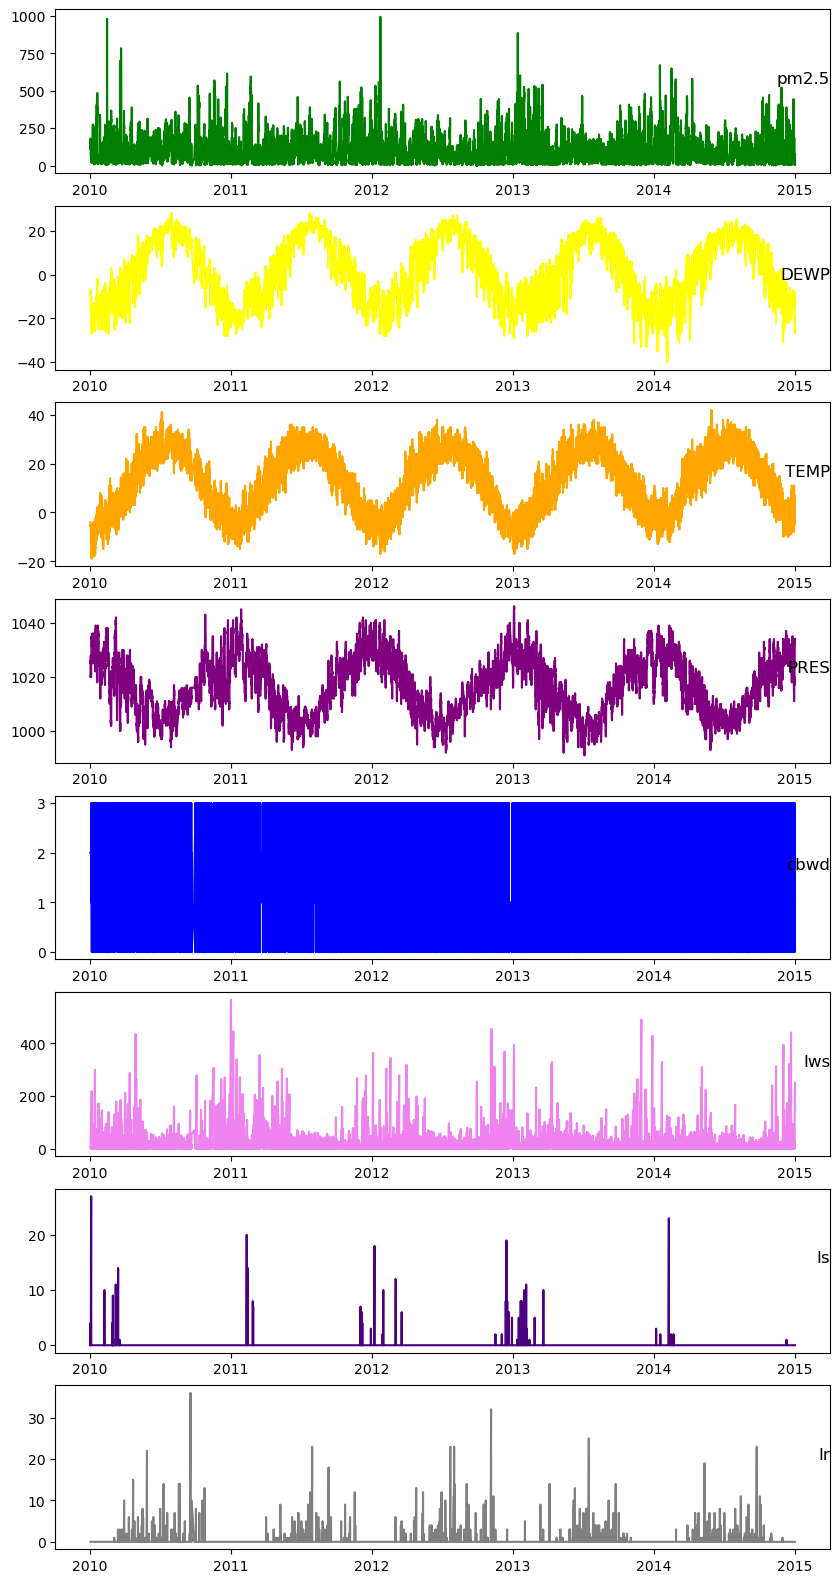

In [33]:
no_cols = len(data_index.columns)
colors = ['red','green','yellow','orange','purple','blue','violet','indigo','grey']
index = 1
plt.figure(figsize = (10,20))
for column in data_index.columns:
    plt.subplot(no_cols,1,index)
    plt.plot(data_index[column],color=colors[index])
    plt.title(column,loc='right',y=0.5)
    index+=1
    
plt.show()

In [34]:
scaler = MinMaxScaler()

In [35]:
data_trafer = scaler.fit_transform(data_index)
print(data_trafer)

[[0.12977867 0.35294118 0.24590164 ... 0.00237151 0.         0.        ]
 [0.14889336 0.36764706 0.24590164 ... 0.00394662 0.         0.        ]
 [0.15995976 0.42647059 0.2295082  ... 0.00552173 0.         0.        ]
 ...
 [0.01006036 0.26470588 0.26229508 ... 0.42873071 0.         0.        ]
 [0.00804829 0.26470588 0.24590164 ... 0.43584525 0.         0.        ]
 [0.01207243 0.27941176 0.26229508 ... 0.44138468 0.         0.        ]]


In [36]:
train, test = train_test_split(data_trafer, test_size = 0.10, shuffle = False)

In [37]:
n_input = 3
n_features = 8

generatorTrain = TimeseriesGenerator(train, train, length = n_input, batch_size=1)
generatorTest = TimeseriesGenerator(test, test, length = n_input, batch_size=1)

In [38]:
bat_0 = generatorTrain[0]
x, y = bat_0
print(x, y)

[[[0.12977867 0.35294118 0.24590164 0.52727273 0.66666667 0.00237151
   0.         0.        ]
  [0.14889336 0.36764706 0.24590164 0.52727273 0.66666667 0.00394662
   0.         0.        ]
  [0.15995976 0.42647059 0.2295082  0.54545455 0.66666667 0.00552173
   0.         0.        ]]] [[0.18209256 0.48529412 0.2295082  0.56363636 0.66666667 0.00868965
  0.03703704 0.        ]]


In [19]:
EPOCHS = 5
#Now we are creating and fiting LSTm network
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
model.fit(generatorTrain, epochs=EPOCHS, batch_size=72, shuffle=False )

Epoch 1/5
37578/37578 [==============================] - 122s 3ms/step - loss: 0.0105
Epoch 2/5
37578/37578 [==============================] - 110s 3ms/step - loss: 0.0098
Epoch 3/5
37578/37578 [==============================] - 109s 3ms/step - loss: 0.0096
Epoch 4/5
37578/37578 [==============================] - 108s 3ms/step - loss: 0.0095
Epoch 5/5
37578/37578 [==============================] - 106s 3ms/step - loss: 0.0094


In [39]:
predictions = []
first_batch = train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))

#now printing first Batch
for i in range(len(test)):
    #getting pridiction value
    current_pred = model.predict(current_batch)[0]
    #now append the pridiction into array and print it
    predictions.append(current_pred)
    #to remove values
    current_batch_rmv_first = current_batch[:,1:,:]
    #update it
    current_batch = np.append(current_batch_rmv_first,[[current_pred]],axis=1)
    break


1/1 [==============================] - 0s 21ms/step


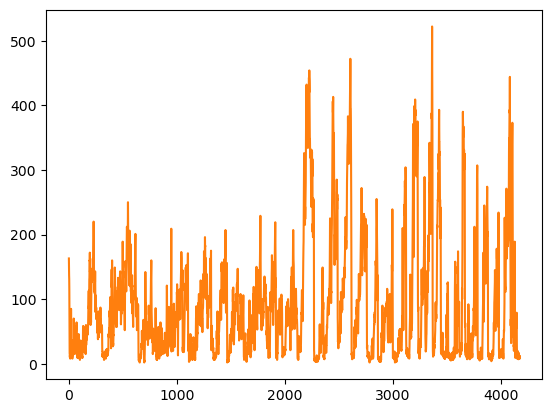

In [40]:
predictions_actual_scale = scaler.inverse_transform(predictions)
test_data_actual_scale = scaler.inverse_transform(test)

#now printing values
plt.plot(predictions_actual_scale[:,0])
plt.plot(test_data_actual_scale[:,0])